In [188]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [154]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
price_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()


price_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# Investigate the data, and do any necessary data cleaning.

In [155]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [156]:
# eleminate alley because only 91 non nul value
price_df=price_df.drop(['alley'],axis=1)

In [157]:
price_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


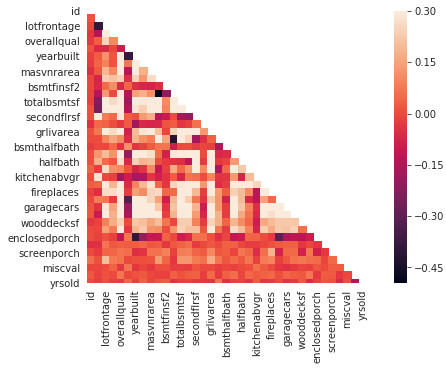

In [158]:
corr = price_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

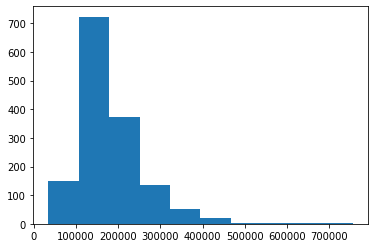

In [159]:
plt.hist(price_df['saleprice']) # target is not normal


In [160]:
cat_df = pd.DataFrame({})
for c in price_df.columns:
    if price_df[c].dtype=='O':
        cat_df[c]=price_df[c]
cat_df.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [161]:
num_df=pd.DataFrame({})
for c in price_df.columns:
    if price_df[c].dtype in ['int64','float64']:
        num_df[c]=price_df[c]
num_df.head()    

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [162]:
cat_df.shape, num_df.shape, price_df.shape

((1460, 42), (1460, 38), (1460, 80))

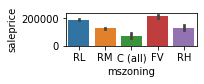

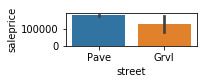

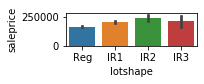

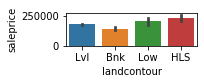

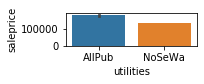

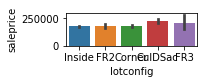

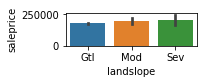

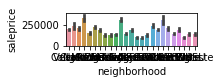

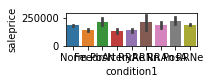

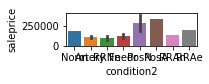

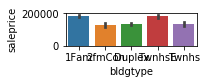

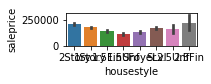

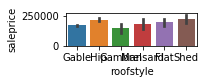

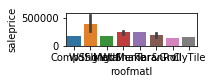

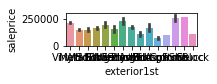

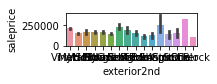

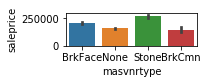

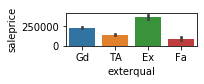

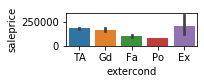

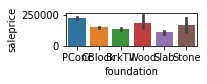

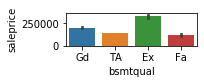

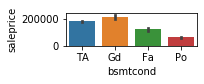

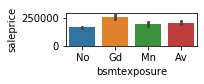

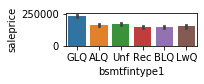

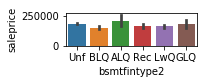

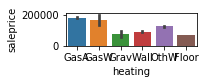

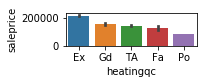

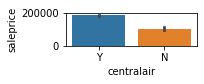

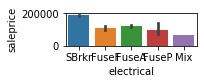

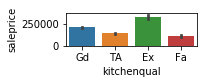

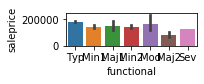

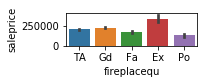

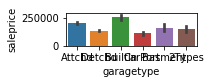

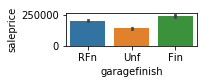

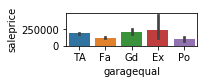

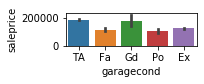

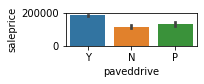

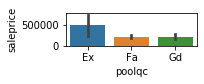

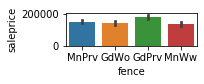

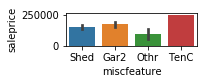

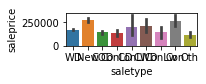

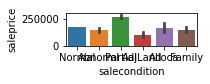

In [163]:
cc=cat_df.columns
i=0
for c in cc:
    plt.figure(figsize=(8,10))
    plt.subplot(14,3,i+1)
    sns.barplot(price_df[c],price_df['saleprice'])
    plt.show()

In [166]:
cat_df.isna().sum()

mszoning         0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfintype2     0
heating          0
heatingqc        0
centralair       0
electrical       0
kitchenqual      0
functional       0
fireplacequ      0
garagetype       0
garagefinish     0
garagequal       0
garagecond       0
paveddrive       0
poolqc           0
fence            0
miscfeature      0
saletype         0
salecondition    0
dtype: int64

In [167]:
cat_df=cat_df.replace(np.nan,'No info')
cat_df

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No info,No info,No info,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,No info,No info,No info,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No info,No info,No info,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,No info,No info,No info,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No info,No info,No info,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No info,No info,No info,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,No info,MnPrv,No info,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No info,GdPrv,Shed,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,No info,No info,No info,WD,Normal


In [168]:
cat_df.isna().sum()

mszoning         0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfintype2     0
heating          0
heatingqc        0
centralair       0
electrical       0
kitchenqual      0
functional       0
fireplacequ      0
garagetype       0
garagefinish     0
garagequal       0
garagecond       0
paveddrive       0
poolqc           0
fence            0
miscfeature      0
saletype         0
salecondition    0
dtype: int64

In [169]:
cat_col=cat_df.columns

In [170]:
num_df.isna().sum()

id                 0
mssubclass         0
lotfrontage      259
lotarea            0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
masvnrarea         8
bsmtfinsf1         0
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
firstflrsf         0
secondflrsf        0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       0
bsmthalfbath       0
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
totrmsabvgrd       0
fireplaces         0
garageyrblt       81
garagecars         0
garagearea         0
wooddecksf         0
openporchsf        0
enclosedporch      0
threessnporch      0
screenporch        0
poolarea           0
miscval            0
mosold             0
yrsold             0
saleprice          0
dtype: int64

In [171]:
num_df.fillna(0,inplace=True)

In [172]:
num_df.drop('saleprice',axis=1).apply(lambda x:x.corr(num_df.saleprice)).sort_values(ascending=False)

overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.472614
fireplaces       0.466929
bsmtfinsf1       0.386420
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
garageyrblt      0.261366
bsmtfullbath     0.227122
bsmtunfsf        0.214479
lotfrontage      0.209624
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
dtype: float64

In [173]:
num_df.drop(['kitchenabvgr','enclosedporch','mssubclass','overallcond','yrsold','lowqualfinsf','id','miscval','bsmthalfbath','bsmtfinsf2','threessnporch','mosold','poolarea','screenporch','bedroomabvgr'],axis=1,inplace=True)

In [174]:
num_df.head(3)

,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,...,fullbath,halfbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,saleprice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500


In [175]:
cat_df=pd.get_dummies(cat_df,drop_first=True)

In [178]:
cat_df.head(1)

,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [179]:
new_df=pd.concat([num_df,cat_df],axis=1)

In [180]:
new_df.head()

,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


# Build your initial model using these features and estimate the parameters using OLS.

In [181]:
x=new_df.drop(['saleprice'],axis=1)

In [182]:
y=new_df['saleprice']

In [183]:
X=sm.add_constant(x)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     66.56
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:25:29   Log-Likelihood:                -16616.
No. Observations:                1460   AIC:                         3.371e+04
Df Residuals:                    1220   BIC:                         3.498e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.384e+06   2.03e+05     -6.811      0.000   -1.78e+06   -9.85e+05
lotfrontage               4.3092     23.488      0.183      0.854     -41.772      50.391
lotarea                   0.7373      0.111      6.660      0.000       0.520       0.954
overallqual            7426.4958   1025.621      7.241      0.000    5414.320    9438.672
yearbuilt               206.9982     74.595      2.775      0.006      60.650     353.346
yearremodadd            240.0368     52.827      4.544      0.000     136.395     343.678
masvnrarea               21.1554      5.907      3.581      0.000       9.566      32.745
bsmtfinsf1                9.5889      8.114      1.182      0.238      -6.330      25.508
bsmtunfsf                -9.9057      8.221     -1.205      0.228     -26.034       6.223
totalbsmtsf              27.2318      9.188      2.964      0.003       9.207      45.257
firstflrsf               51.3071     19.770      2.595      0.010      12.519      90.095
secondflrsf              68.2781     18.500      3.691      0.000      31.983     104.573
grlivarea                -6.7082     19.333     -0.347      0.729     -44.639      31.222
bsmtfullbath            160.6134   1905.552      0.084      0.933   -3577.909    3899.136
fullbath               1991.6623   2219.346      0.897      0.370   -2362.495    6345.820
halfbath               1654.6640   2140.376      0.773      0.440   -2544.563    5853.891
totrmsabvgrd            342.6178    879.214      0.390      0.697   -1382.321    2067.556
fireplaces             6490.8611   2608.028      2.489      0.013    1374.144    1.16e+04
garageyrblt             -70.8480     61.754     -1.147      0.251    -192.004      50.308
garagecars             3689.4295   2322.068      1.589      0.112    -866.259    8245.118
garagearea               21.6679      8.039      2.695      0.007       5.896      37.440
wooddecksf               15.2175      5.915      2.573      0.010       3.612      26.823
openporchsf               6.3604     11.679      0.545      0.586     -16.553      29.274
mszoning_FV            3.847e+04   1.22e+04      3.162      0.002    1.46e+04    6.23e+04
mszoning_RH            2.893e+04   1.21e+04      2.394      0.017    5226.093    5.26e+04
mszoning_RL             3.19e+04   1.03e+04      3.084      0.002    1.16e+04    5.22e+04
mszoning_RM             2.88e+04   9667.836      2.979      0.003    9836.329    4.78e+04
street_Pave            3.107e+04   1.22e+04      2.538      0.011    7054.351    5.51e+04
lotshape_IR2           4246.2358   4303.159      0.987      0.324   -4196.176    1.27e+04
lotshape_IR3           2459.2616   9014.386      0.273      0.785   -1.52e+04    2.01e+04
lotshape_Reg            962.6948   1673.061      0.575      0.565   -2319.701    4245.091
landcontour_HLS        

# For Experiment purpose

In [145]:

X_train,X_test,y_train,y_test=train_test_split(x,y)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8081057576606878

### Way2 

In [314]:
num_df2=pd.DataFrame({})
for c in price_df.columns:
    if price_df[c].dtype in ['int64','float64']:
        num_df2[c]=price_df[c]
num_df2.head(3) 

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


In [315]:
new_df2=pd.concat([num_df2,cat_df],axis=1)

In [316]:
new_df2.dropna(inplace=True)

In [317]:
x=new_df2.drop(['saleprice','id'],axis=1)
y=new_df2['saleprice']

In [318]:
x = x.reset_index()

In [319]:
sc=StandardScaler()

In [320]:
x=sc.fit_transform(x)


In [321]:
y=y.values.reshape(-1,1)
y=sc.fit_transform(y)

In [322]:
pca=PCA(n_components=60)

In [323]:
pca

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [324]:
x=pca.fit_transform(x)

In [325]:
pca.explained_variance_ratio_

array([0.07178413, 0.03013972, 0.02917453, 0.02542648, 0.02071198,
       0.01621382, 0.01519251, 0.01480156, 0.01452315, 0.01289846,
       0.01263681, 0.01231865, 0.01182526, 0.01151601, 0.01123567,
       0.01078988, 0.01055916, 0.01030503, 0.01015226, 0.00988537,
       0.00964228, 0.00953127, 0.00928098, 0.00909494, 0.00888354,
       0.00865999, 0.00853427, 0.00846332, 0.00820988, 0.00807625,
       0.00792574, 0.00787406, 0.00753066, 0.00743698, 0.0073732 ,
       0.00729573, 0.00725681, 0.0071478 , 0.00701073, 0.00690959,
       0.00687731, 0.00671703, 0.00651266, 0.00642692, 0.00632177,
       0.00621092, 0.00617014, 0.00609188, 0.00596315, 0.00582125,
       0.00582018, 0.00570194, 0.00560367, 0.00557739, 0.00535725,
       0.00530938, 0.00525414, 0.00513013, 0.00506194, 0.00503895])

In [326]:
X=sm.add_constant(x)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     83.92
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:14:46   Log-Likelihood:                -610.17
No. Observations:                1121   AIC:                             1342.
Df Residuals:                    1060   BIC:                             1649.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.51e-17      0.013   3.52e-15      1.000      -0.025       0.025
x1             0.1846      0.003     60.694      0.000       0.179       0.191
x2             0.0332      0.005      7.074      0.000       0.024       0.042
x3            -0.0169      0.005     -3.532      0.000      -0.026      -0.007
x4             0.1365      0.005     26.710      0.000       0.126       0.147
x5             0.0209      0.006      3.683      0.000       0.010       0.032
x6             0.0396      0.006      6.191      0.000       0.027       0.052
x7             0.0173      0.007      2.619      0.009       0.004       0.030
x8            -0.0225      0.007     -3.363      0.001      -0.036      -0.009
x9            -0.0377      0.007     -5.574      0.000      -0.051      -0.024
x10            0.0063      0.007      0.882      0.378      -0.008       0.020
x11           -0.0287      0.007     -3.956      0.000      -0.043      -0.014
x12            0.0749      0.007     10.199      0.000       0.060       0.089
x13           -0.0032      0.007     -0.430      0.667      -0.018       0.011
x14            0.0128      0.008      1.686      0.092      -0.002       0.028
x15            0.0129      0.008      1.680      0.093      -0.002       0.028
x16            0.0034      0.008      0.435      0.664      -0.012       0.019
x17           -0.0220      0.008     -2.778      0.006      -0.038      -0.006
x18           -0.0049      0.008     -0.608      0.544      -0.021       0.011
x19           -0.0036      0.008     -0.448      0.654      -0.019       0.012
x20           -0.0394      0.008     -4.810      0.000      -0.056      -0.023
x21           -0.0090      0.008     -1.083      0.279      -0.025       0.007
x22           -0.0360      0.008     -4.308      0.000      -0.052      -0.020
x23           -0.0194      0.008     -2.289      0.022      -0.036      -0.003
x24            0.0117      0.009      1.367      0.172      -0.005       0.028
x25            0.0009      0.009      0.099      0.921      -0.016       0.018
x26            0.0391      0.009      4.465      0.000       0.022       0.056
x27            0.0255      0.009      2.891      0.004       0.008       0.043
x28           -0.0078      0.009     -0.883      0.377      -0.025       0.010
x29            0.0223      0.009      2.474      0.014       0.005       0.040
x30            0.0138      0.009      1.522      0.128      -0.004       0.032
x31            0.0272      0.009      2.976      0.003       0.009       0.045
x32           -0.0372      0.009     -4.053      0.000      -0.055      -0.019
x33           -0.0507      0.009     -5.399      0.000      -0.069      -0.032
x34            0.0165      0.009      1.749      0.081      -0.002       0.035
x35            0.0034      0.009      0.361      0.719      -0.015       0.022
x3